In [ ]:
import pandas as pd
import json
import ast
import re
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
plt.style.use("ggplot")
import seaborn as sns
color = sns.color_palette()
sns.set(style='darkgrid')
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from mlxtend.preprocessing import minmax_scaling

from sklearn import preprocessing
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import GridSearchCV
from scipy.sparse import csr_matrix, hstack
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from lightgbm import LGBMRegressor
import joblib

In [ ]:
# set the max columns to none
pd.set_option('display.max_columns', None)

In [ ]:
df2=pd.read_excel('/content/fashion_brand_details.xlsx')

In [ ]:
df1= pd.read_csv('/content/fashion_dataset.csv')

In [ ]:
df1.head(10)

,p_id,name,price,colour,brand,ratingCount,avg_rating,description,p_attributes
0,1518329.0,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,Dupatta Bazaar,1321.0,4.548827,White embroidered&nbsp;dupattaChiffon<br>Hand-...,"{'Occasion': 'Daily', 'Pattern': 'Embroidered'..."
1,5829334.0,Roadster Women Mustard Yellow Solid Hooded Swe...,1199.0,Mustard,Roadster,5462.0,4.313255,"Mustard yellow solid sweatshirt, has a hood, t...","{'Body Shape ID': '443,424,324', 'Body or Garm..."
2,10340119.0,Inddus Peach-Coloured & Beige Unstitched Dress...,5799.0,Peach,Inddus,145.0,4.068966,Peach-Coloured and beige woven design unstitch...,"{'Bottom Fabric': 'Cotton Blend', 'Bottom Patt..."
3,10856380.0,SASSAFRAS Women Black Parallel Trousers,1499.0,Black,SASSAFRAS,9124.0,4.147523,"Black solid woven high-rise parallel trousers,...","{'Add-Ons': 'NA', 'Body Shape ID': '424', 'Bod..."
4,12384822.0,Kotty Women Black Wide Leg High-Rise Clean Loo...,1999.0,Black,Kotty,12260.0,4.078467,"Black dark wash 4-pocket high-rise jeans, clea...","{'Add-Ons': 'NA', 'Brand Fit Name': 'NA', 'Clo..."
5,12742100.0,KASSUALLY Women Black & Pink Printed Basic Jum...,2199.0,Black,KASSUALLY,6297.0,4.349214,"Black printed basic jumpsuit, has a V-neck, lo...",{'Body or Garment Size': 'Garment Measurements...
6,13842966.0,Sassafras Brown & Red Geometric Printed George...,1499.0,Brown,SASSAFRAS,7358.0,4.395352,<ul><li>Brown and red crop wrap top</li><li>Pr...,"{'Body Shape ID': '333,424', 'Body or Garment ..."
7,14021452.0,Sera Women Multicoloured Printed Tie-Up Shrug,1494.0,Multi,Sera,750.0,4.288000,"Brown and blue printed tie-up longline shrug, ...",{'Body or Garment Size': 'To-Fit Denotes Body ...
8,14063026.0,Tokyo Talkies Women Black Solid Regular Shorts,699.0,Black,Tokyo Talkies,1856.0,4.530711,"Black solid mid-rise regular shorts, has 2 poc...",{'Body or Garment Size': 'To-Fit Denotes Body ...
9,14324806.0,Anouk Stylish Black Solid Ready to Wear Leheng...,4699.0,Black,Anouk,84.0,3.809524,Stay fashionable in any season when you don th...,"{'Blouse Closure': 'Zip', 'Blouse Fabric': 'Vi..."


In [ ]:
Both_DFs = pd.merge(df1.set_index('p_id', drop=False),df2.set_index('brand_id', drop=False), how='left',left_on=['brand'],right_on=['brand_name']).reset_index()
Both_DFs

,index,p_id,name,price,colour,brand,ratingCount,avg_rating,description,p_attributes,brand_id,brand_name
0,0,1518329.0,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,Dupatta Bazaar,1321.0,4.548827,White embroidered&nbsp;dupattaChiffon<br>Hand-...,"{'Occasion': 'Daily', 'Pattern': 'Embroidered'...",242.0,Dupatta Bazaar
1,1,5829334.0,Roadster Women Mustard Yellow Solid Hooded Swe...,1199.0,Mustard,Roadster,5462.0,4.313255,"Mustard yellow solid sweatshirt, has a hood, t...","{'Body Shape ID': '443,424,324', 'Body or Garm...",750.0,Roadster
2,2,10340119.0,Inddus Peach-Coloured & Beige Unstitched Dress...,5799.0,Peach,Inddus,145.0,4.068966,Peach-Coloured and beige woven design unstitch...,"{'Bottom Fabric': 'Cotton Blend', 'Bottom Patt...",389.0,Inddus
3,3,10856380.0,SASSAFRAS Women Black Parallel Trousers,1499.0,Black,SASSAFRAS,9124.0,4.147523,"Black solid woven high-rise parallel trousers,...","{'Add-Ons': 'NA', 'Body Shape ID': '424', 'Bod...",NaN,NaN
4,4,12384822.0,Kotty Women Black Wide Leg High-Rise Clean Loo...,1999.0,Black,Kotty,12260.0,4.078467,"Black dark wash 4-pocket high-rise jeans, clea...","{'Add-Ons': 'NA', 'Brand Fit Name': 'NA', 'Clo...",482.0,Kotty
...,...,...,...,...,...,...,...,...,...,...,...,...
14324,14324,17029604.0,The Chennai Silks Pink & Silver-Toned Floral Z...,3999.0,Pink,The Chennai Silks,NaN,NaN,<b>Design Details </b><ul><li>Pink and silver-...,"{'Better Cotton Initiative': 'Regular', 'Blous...",880.0,The Chennai Silks
14325,14325,17600212.0,Kinder Kids Girls Blue & Green Printed Foil Pr...,2050.0,Blue,Kinder Kids,NaN,NaN,"Blue and green printed lehenga choli, has foi...","{'Blouse Closure': 'NA', 'Blouse Fabric': 'Cot...",471.0,Kinder Kids
14326,14326,18159266.0,KLOTTHE Women Green & Black Floral Printed Pal...,1659.0,Green,KLOTTHE,NaN,NaN,<ul> <li> Green and black woven palazzos </li>...,{'Body or Garment Size': 'To-Fit Denotes Body ...,NaN,NaN
14327,14327,18921114.0,InWeave Women Red Printed A-Line Skirt,2399.0,Red,InWeave,NaN,NaN,"<p>Red printed A-line skirt, has drawstring cl...","{'Add-Ons': 'NA', 'Body Shape ID': '324,333,42...",NaN,NaN




---



In [ ]:
Both_DFs.head(5)

,index,p_id,name,price,colour,brand,ratingCount,avg_rating,description,p_attributes,brand_id,brand_name
0,0,1518329.0,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,Dupatta Bazaar,1321.0,4.548827,White embroidered&nbsp;dupattaChiffon<br>Hand-...,"{'Occasion': 'Daily', 'Pattern': 'Embroidered'...",242.0,Dupatta Bazaar
1,1,5829334.0,Roadster Women Mustard Yellow Solid Hooded Swe...,1199.0,Mustard,Roadster,5462.0,4.313255,"Mustard yellow solid sweatshirt, has a hood, t...","{'Body Shape ID': '443,424,324', 'Body or Garm...",750.0,Roadster
2,2,10340119.0,Inddus Peach-Coloured & Beige Unstitched Dress...,5799.0,Peach,Inddus,145.0,4.068966,Peach-Coloured and beige woven design unstitch...,"{'Bottom Fabric': 'Cotton Blend', 'Bottom Patt...",389.0,Inddus
3,3,10856380.0,SASSAFRAS Women Black Parallel Trousers,1499.0,Black,SASSAFRAS,9124.0,4.147523,"Black solid woven high-rise parallel trousers,...","{'Add-Ons': 'NA', 'Body Shape ID': '424', 'Bod...",NaN,NaN
4,4,12384822.0,Kotty Women Black Wide Leg High-Rise Clean Loo...,1999.0,Black,Kotty,12260.0,4.078467,"Black dark wash 4-pocket high-rise jeans, clea...","{'Add-Ons': 'NA', 'Brand Fit Name': 'NA', 'Clo...",482.0,Kotty


In [ ]:
Both_DFs.avg_rating.describe()

count    6581.000000
mean        4.101226
std         0.475633
min         1.000000
25%         3.888889
50%         4.180822
75%         4.392857
max         5.000000
Name: avg_rating, dtype: float64

In [ ]:
Both_DFs.ratingCount.describe()

count     6581.000000
mean       184.479410
std        782.501137
min          1.000000
25%          9.000000
50%         23.000000
75%         80.000000
max      21274.000000
Name: ratingCount, dtype: float64

In [ ]:
Both_DFs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14329 entries, 0 to 14328
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         14329 non-null  int64  
 1   p_id          14311 non-null  float64
 2   name          14310 non-null  object 
 3   price         14310 non-null  float64
 4   colour        14307 non-null  object 
 5   brand         14305 non-null  object 
 6   ratingCount   6581 non-null   float64
 7   avg_rating    6581 non-null   float64
 8   description   14310 non-null  object 
 9   p_attributes  14310 non-null  object 
 10  brand_id      8098 non-null   float64
 11  brand_name    8098 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 1.3+ MB


In [ ]:
# To get the statistical summary
Both_DFs.describe()

,index,p_id,price,ratingCount,avg_rating,brand_id
count,14329.000000,1.431100e+04,14310.000000,6581.000000,6581.000000,8098.000000
mean,7164.000000,1.569129e+07,2964.168484,184.479410,4.101226,524.432823
std,4136.570339,3.153525e+06,2564.014851,782.501137,0.475633,299.716776
min,0.000000,7.016600e+04,169.000000,1.000000,1.000000,1.000000
25%,3582.000000,1.413618e+07,1599.000000,9.000000,3.888889,242.000000
50%,7164.000000,1.638217e+07,2200.000000,23.000000,4.180822,554.000000
75%,10746.000000,1.808452e+07,3495.000000,80.000000,4.392857,776.000000
max,14328.000000,1.941576e+07,47999.000000,21274.000000,5.000000,1017.000000


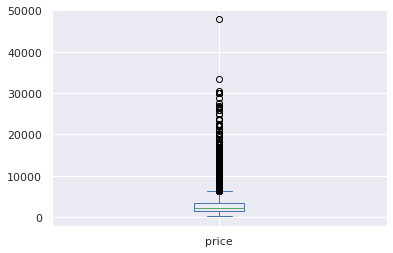

In [ ]:
Both_DFs['price'].plot(kind='box')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


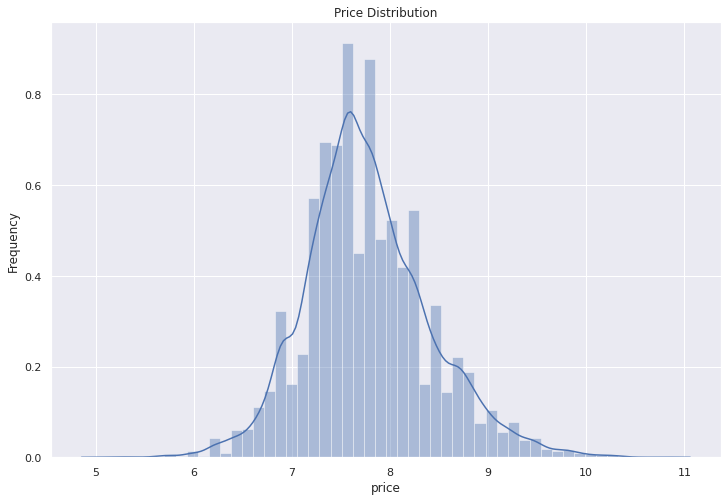

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(np.log1p(Both_DFs['price']), bins=50, kde=True)
plt.title('Price Distribution', fontsize=12)
plt.xlabel('price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

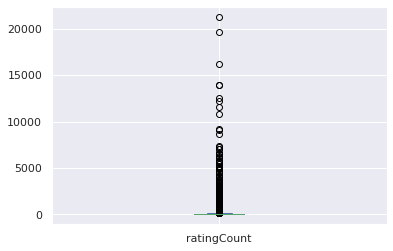

In [ ]:
Both_DFs['ratingCount'].plot(kind='box')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


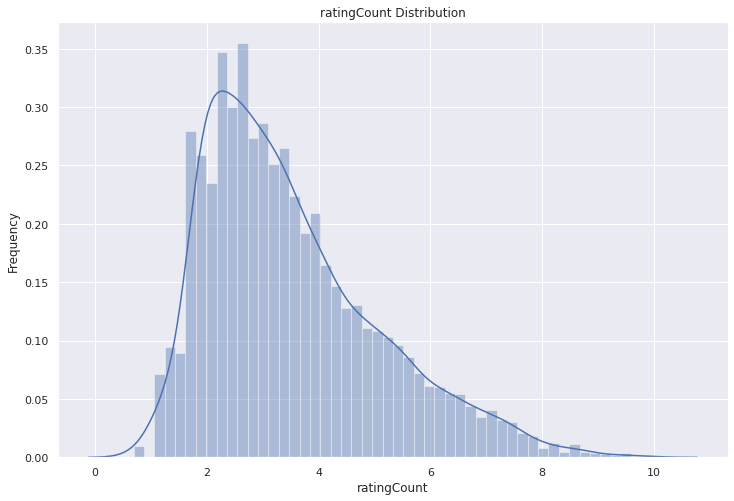

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(np.log1p(Both_DFs['ratingCount']), bins=50, kde=True)
plt.title('ratingCount Distribution', fontsize=12)
plt.xlabel('ratingCount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

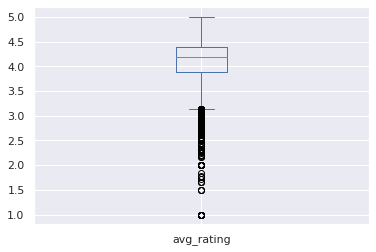

In [ ]:
Both_DFs['avg_rating'].plot(kind='box')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


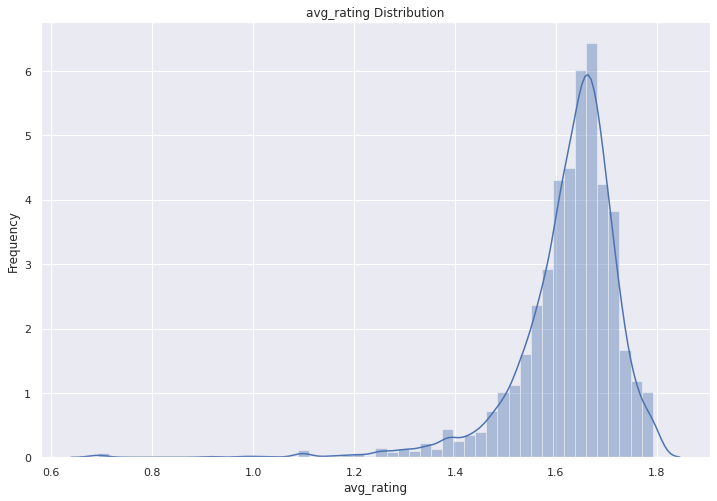

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(np.log1p(Both_DFs['avg_rating']), bins=50, kde=True)
plt.title('avg_rating Distribution', fontsize=12)
plt.xlabel('avg_rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [ ]:
Both_DFs['ratingCount'].mode()

0    5.0
dtype: float64

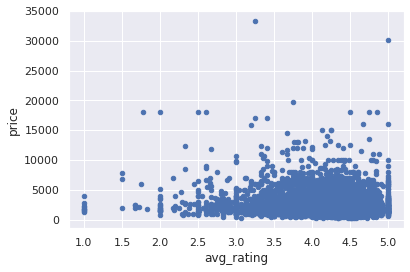

In [ ]:
Both_DFs.plot(kind='scatter', x='avg_rating', y='price')

# New Section
Data Preprocessing**

-Missing values

-Formatting

-Normalisation

-Binning

# - categorical to numerical

In [ ]:
Both_DFs=Both_DFs.drop_duplicates(subset=['p_id'])
Both_DFs

,index,p_id,name,price,colour,brand,ratingCount,avg_rating,description,p_attributes,brand_id,brand_name
0,0,1518329.0,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,Dupatta Bazaar,1321.0,4.548827,White embroidered&nbsp;dupattaChiffon<br>Hand-...,"{'Occasion': 'Daily', 'Pattern': 'Embroidered'...",242.0,Dupatta Bazaar
1,1,5829334.0,Roadster Women Mustard Yellow Solid Hooded Swe...,1199.0,Mustard,Roadster,5462.0,4.313255,"Mustard yellow solid sweatshirt, has a hood, t...","{'Body Shape ID': '443,424,324', 'Body or Garm...",750.0,Roadster
2,2,10340119.0,Inddus Peach-Coloured & Beige Unstitched Dress...,5799.0,Peach,Inddus,145.0,4.068966,Peach-Coloured and beige woven design unstitch...,"{'Bottom Fabric': 'Cotton Blend', 'Bottom Patt...",389.0,Inddus
3,3,10856380.0,SASSAFRAS Women Black Parallel Trousers,1499.0,Black,SASSAFRAS,9124.0,4.147523,"Black solid woven high-rise parallel trousers,...","{'Add-Ons': 'NA', 'Body Shape ID': '424', 'Bod...",NaN,NaN
4,4,12384822.0,Kotty Women Black Wide Leg High-Rise Clean Loo...,1999.0,Black,Kotty,12260.0,4.078467,"Black dark wash 4-pocket high-rise jeans, clea...","{'Add-Ons': 'NA', 'Brand Fit Name': 'NA', 'Clo...",482.0,Kotty
...,...,...,...,...,...,...,...,...,...,...,...,...
14324,14324,17029604.0,The Chennai Silks Pink & Silver-Toned Floral Z...,3999.0,Pink,The Chennai Silks,NaN,NaN,<b>Design Details </b><ul><li>Pink and silver-...,"{'Better Cotton Initiative': 'Regular', 'Blous...",880.0,The Chennai Silks
14325,14325,17600212.0,Kinder Kids Girls Blue & Green Printed Foil Pr...,2050.0,Blue,Kinder Kids,NaN,NaN,"Blue and green printed lehenga choli, has foi...","{'Blouse Closure': 'NA', 'Blouse Fabric': 'Cot...",471.0,Kinder Kids
14326,14326,18159266.0,KLOTTHE Women Green & Black Floral Printed Pal...,1659.0,Green,KLOTTHE,NaN,NaN,<ul> <li> Green and black woven palazzos </li>...,{'Body or Garment Size': 'To-Fit Denotes Body ...,NaN,NaN
14327,14327,18921114.0,InWeave Women Red Printed A-Line Skirt,2399.0,Red,InWeave,NaN,NaN,"<p>Red printed A-line skirt, has drawstring cl...","{'Add-Ons': 'NA', 'Body Shape ID': '324,333,42...",NaN,NaN


In [ ]:

Both_DFs['ratingCount'].isna().sum()

7688

In [ ]:
#fill missing values wit mean of column
Both_DFs['avg_rating']=Both_DFs['avg_rating'].fillna(Both_DFs['avg_rating'].mode()[0])
Both_DFs['ratingCount']=Both_DFs['ratingCount'].fillna(Both_DFs['ratingCount'].mode()[0])
Both_DFs['avg_rating'] = np.round(Both_DFs['avg_rating'], decimals = 1)#round the values up to 1dp
#Both_DFs['ratingCount'] = Both_DFs['ratingCount'].apply(np.ceil) #round up values to closest highest value(whole number)
Both_DFs['price']=Both_DFs['price'].fillna(Both_DFs['price'].mean())
Both_DFs['name']=Both_DFs['name'].fillna('undefined_name')
Both_DFs['colour']=Both_DFs['colour'].fillna('undefined_colour')
Both_DFs['p_id']=Both_DFs['p_id'].fillna(0)
Both_DFs['brand']=Both_DFs['brand'].fillna('undefined_brand')

<ipython-input-22-a4c23078fc81>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Both_DFs['avg_rating']=Both_DFs['avg_rating'].fillna(Both_DFs['avg_rating'].mode()[0])
<ipython-input-22-a4c23078fc81>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Both_DFs['ratingCount']=Both_DFs['ratingCount'].fillna(Both_DFs['ratingCount'].mode()[0])
<ipython-input-22-a4c23078fc81>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [ ]:

Both_DFs= Both_DFs.drop('brand_name', axis=1)
Both_DFs=Both_DFs.drop('brand_id', axis=1)


In [ ]:
Both_DFs.isna().sum()

index           0
p_id            0
name            0
price           0
colour          0
brand           0
ratingCount     0
avg_rating      0
description     2
p_attributes    2
dtype: int64

In [ ]:
Both_DFs.describe(include='all')

,index,p_id,name,price,colour,brand,ratingCount,avg_rating,description,p_attributes
count,14223.000000,1.422300e+04,14223,14223.000000,14223,14223,14223.000000,14223.000000,14221,14221
unique,NaN,NaN,13881,NaN,50,1021,NaN,NaN,14188,13094
top,NaN,NaN,SCORPIOUS Women Pack of Shrug & Top,NaN,Black,Roadster,NaN,NaN,"White light wash 5-pocket high-rise jeans, cle...","{'Border': 'Fringed', 'Fabric': 'Net', 'Occasi..."
freq,NaN,NaN,10,NaN,1902,346,NaN,NaN,3,33
mean,7159.377276,1.568915e+07,NaN,2970.033190,NaN,NaN,87.337482,4.046460,NaN,NaN
std,4139.413978,3.157320e+06,NaN,2569.639842,NaN,NaN,537.638096,0.326735,NaN,NaN
min,0.000000,0.000000e+00,NaN,169.000000,NaN,NaN,1.000000,1.000000,NaN,NaN
25%,3571.500000,1.413744e+07,NaN,1599.000000,NaN,NaN,5.000000,4.000000,NaN,NaN
50%,7159.000000,1.638203e+07,NaN,2215.000000,NaN,NaN,5.000000,4.000000,NaN,NaN
75%,10746.500000,1.807606e+07,NaN,3498.000000,NaN,NaN,19.000000,4.100000,NaN,NaN


In [ ]:
Both_DFs.head(20)

,index,p_id,name,price,colour,brand,ratingCount,avg_rating,description,p_attributes
0,0,1518329.0,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,Dupatta Bazaar,1321.0,4.5,White embroidered&nbsp;dupattaChiffon<br>Hand-...,"{'Occasion': 'Daily', 'Pattern': 'Embroidered'..."
1,1,5829334.0,Roadster Women Mustard Yellow Solid Hooded Swe...,1199.0,Mustard,Roadster,5462.0,4.3,"Mustard yellow solid sweatshirt, has a hood, t...","{'Body Shape ID': '443,424,324', 'Body or Garm..."
2,2,10340119.0,Inddus Peach-Coloured & Beige Unstitched Dress...,5799.0,Peach,Inddus,145.0,4.1,Peach-Coloured and beige woven design unstitch...,"{'Bottom Fabric': 'Cotton Blend', 'Bottom Patt..."
3,3,10856380.0,SASSAFRAS Women Black Parallel Trousers,1499.0,Black,SASSAFRAS,9124.0,4.1,"Black solid woven high-rise parallel trousers,...","{'Add-Ons': 'NA', 'Body Shape ID': '424', 'Bod..."
4,4,12384822.0,Kotty Women Black Wide Leg High-Rise Clean Loo...,1999.0,Black,Kotty,12260.0,4.1,"Black dark wash 4-pocket high-rise jeans, clea...","{'Add-Ons': 'NA', 'Brand Fit Name': 'NA', 'Clo..."
5,5,12742100.0,KASSUALLY Women Black & Pink Printed Basic Jum...,2199.0,Black,KASSUALLY,6297.0,4.3,"Black printed basic jumpsuit, has a V-neck, lo...",{'Body or Garment Size': 'Garment Measurements...
6,6,13842966.0,Sassafras Brown & Red Geometric Printed George...,1499.0,Brown,SASSAFRAS,7358.0,4.4,<ul><li>Brown and red crop wrap top</li><li>Pr...,"{'Body Shape ID': '333,424', 'Body or Garment ..."
7,7,14021452.0,Sera Women Multicoloured Printed Tie-Up Shrug,1494.0,Multi,Sera,750.0,4.3,"Brown and blue printed tie-up longline shrug, ...",{'Body or Garment Size': 'To-Fit Denotes Body ...
8,8,14063026.0,Tokyo Talkies Women Black Solid Regular Shorts,699.0,Black,Tokyo Talkies,1856.0,4.5,"Black solid mid-rise regular shorts, has 2 poc...",{'Body or Garment Size': 'To-Fit Denotes Body ...
9,9,14324806.0,Anouk Stylish Black Solid Ready to Wear Leheng...,4699.0,Black,Anouk,84.0,3.8,Stay fashionable in any season when you don th...,"{'Blouse Closure': 'Zip', 'Blouse Fabric': 'Vi..."


In [ ]:
Both_DFs

,index,p_id,name,price,colour,brand,ratingCount,avg_rating,description,p_attributes
0,0,1518329.0,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,Dupatta Bazaar,1321.0,4.5,White embroidered&nbsp;dupattaChiffon<br>Hand-...,"{'Occasion': 'Daily', 'Pattern': 'Embroidered'..."
1,1,5829334.0,Roadster Women Mustard Yellow Solid Hooded Swe...,1199.0,Mustard,Roadster,5462.0,4.3,"Mustard yellow solid sweatshirt, has a hood, t...","{'Body Shape ID': '443,424,324', 'Body or Garm..."
2,2,10340119.0,Inddus Peach-Coloured & Beige Unstitched Dress...,5799.0,Peach,Inddus,145.0,4.1,Peach-Coloured and beige woven design unstitch...,"{'Bottom Fabric': 'Cotton Blend', 'Bottom Patt..."
3,3,10856380.0,SASSAFRAS Women Black Parallel Trousers,1499.0,Black,SASSAFRAS,9124.0,4.1,"Black solid woven high-rise parallel trousers,...","{'Add-Ons': 'NA', 'Body Shape ID': '424', 'Bod..."
4,4,12384822.0,Kotty Women Black Wide Leg High-Rise Clean Loo...,1999.0,Black,Kotty,12260.0,4.1,"Black dark wash 4-pocket high-rise jeans, clea...","{'Add-Ons': 'NA', 'Brand Fit Name': 'NA', 'Clo..."
...,...,...,...,...,...,...,...,...,...,...
14324,14324,17029604.0,The Chennai Silks Pink & Silver-Toned Floral Z...,3999.0,Pink,The Chennai Silks,5.0,4.0,<b>Design Details </b><ul><li>Pink and silver-...,"{'Better Cotton Initiative': 'Regular', 'Blous..."
14325,14325,17600212.0,Kinder Kids Girls Blue & Green Printed Foil Pr...,2050.0,Blue,Kinder Kids,5.0,4.0,"Blue and green printed lehenga choli, has foi...","{'Blouse Closure': 'NA', 'Blouse Fabric': 'Cot..."
14326,14326,18159266.0,KLOTTHE Women Green & Black Floral Printed Pal...,1659.0,Green,KLOTTHE,5.0,4.0,<ul> <li> Green and black woven palazzos </li>...,{'Body or Garment Size': 'To-Fit Denotes Body ...
14327,14327,18921114.0,InWeave Women Red Printed A-Line Skirt,2399.0,Red,InWeave,5.0,4.0,"<p>Red printed A-line skirt, has drawstring cl...","{'Add-Ons': 'NA', 'Body Shape ID': '324,333,42..."


In [ ]:
Both_DFs.avg_rating.describe(percentiles = [0.8, 0.9, 0.95, 0.99])

count    14223.000000
mean         4.046460
std          0.326735
min          1.000000
50%          4.000000
80%          4.200000
90%          4.400000
95%          4.600000
99%          4.900000
max          5.000000
Name: avg_rating, dtype: float64

In [ ]:
Both_DFs.ratingCount.describe(percentiles = [0.8, 0.9, 0.95, 0.99])

count    14223.000000
mean        87.337482
std        537.638096
min          1.000000
50%          5.000000
80%         30.000000
90%        103.000000
95%        289.000000
99%       1653.900000
max      21274.000000
Name: ratingCount, dtype: float64

In [ ]:
Both_DFs.brand.value_counts()[0:11]
Both_DFs.colour.value_counts()[0:11]

Black        1902
Blue         1803
Pink         1171
Green        1082
Navy Blue     842
White         807
Red           708
Grey          571
Maroon        521
Yellow        496
Beige         486
Name: colour, dtype: int64

In [ ]:

Both_DFs['p_attributes'][15] #DICT

"{'Add-Ons': 'NA', 'Body Shape ID': '424', 'Body or Garment Size': 'Garment Measurements in', 'Character': 'NA', 'Closure': 'Button', 'Collar': 'Spread Collar', 'Fabric': 'Cotton', 'Features': 'NA', 'Hemline': 'Straight', 'Length': 'Regular', 'Lining Fabric': 'Unlined', 'Main Trend': 'NA', 'Number of Pockets': '2', 'Occasion': 'Casual', 'Pattern': 'Printed', 'Print or Pattern Type': 'Graphic', 'Sleeve Length': 'Long Sleeves', 'Sport': 'NA', 'Sport Team': 'NA', 'Surface Styling': 'NA', 'Sustainable': 'Regular', 'Technology': 'NA', 'Technology Present': 'No', 'Type': 'Open Front Jacket', 'Wash Care': 'Machine Wash', 'Weave Type': 'Woven'}"

In [ ]:
Both_DFs['description'][15]

"White graphic printed open front jacket,  has a spread collar,  2  pockets ,has a button closure, long sleeves,  straight  hemline, without  liningThe model (height 5'8) is wearing a size Scotton<br>Machine Wash"

In [ ]:
import ast
Both_DFs=Both_DFs.dropna()
Both_DFs["p_attributes"] =  Both_DFs["p_attributes"]# Filling NaN with an empty dict representation
amb = Both_DFs["p_attributes"].apply(lambda x: ast.literal_eval(x)).copy() # Using ast literal_eval to convert string representation to actual dict
amb = amb.apply(lambda x: x if x else None) # Making empty dicts as None
amb = amb.dropna() # Dropping None's
amb

<ipython-input-33-8d7d66629664>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Both_DFs["p_attributes"] =  Both_DFs["p_attributes"]# Filling NaN with an empty dict representation


0        {'Occasion': 'Daily', 'Pattern': 'Embroidered'...
1        {'Body Shape ID': '443,424,324', 'Body or Garm...
2        {'Bottom Fabric': 'Cotton Blend', 'Bottom Patt...
3        {'Add-Ons': 'NA', 'Body Shape ID': '424', 'Bod...
4        {'Add-Ons': 'NA', 'Brand Fit Name': 'NA', 'Clo...
                               ...                        
14324    {'Better Cotton Initiative': 'Regular', 'Blous...
14325    {'Blouse Closure': 'NA', 'Blouse Fabric': 'Cot...
14326    {'Body or Garment Size': 'To-Fit Denotes Body ...
14327    {'Add-Ons': 'NA', 'Body Shape ID': '324,333,42...
14328    {'Add-Ons': 'NA', 'Body Shape ID': '443,333,42...
Name: p_attributes, Length: 14221, dtype: object

In [ ]:
temp = pd.DataFrame([*amb], amb.index) # Creating the temp dataframe where cols are the keys from the dictionaries
Both_DFs = Both_DFs.join(temp) # Joining with original dataframe

In [ ]:
Both_DFs

,index,p_id,name,price,colour,brand,ratingCount,avg_rating,description,p_attributes,Occasion,Pattern,Print or Pattern Type,Body Shape ID,Body or Garment Size,Closure,Fabric,Hemline,Hood,Length,Neck,Number of Pockets,Pocket,Sleeve Length,Surface Styling,Type,Wash Care,Bottom Fabric,Bottom Pattern,Dupatta Border,Dupatta Fabric,Dupatta Pattern,Kurta Fabric,Kurta Pattern,Ornamentation,Set Content,Stitch,Technique,Add-Ons,Brand Fit Name,Character,Fabric 2,Features,Fit,Fly Type,Main Trend,Multipack Set,Sustainable,Type of Pleat,Waist Rise,Weave Type,Distress,Effects,Fabric 3,Fade,Reversible,Shade,Stretch,Type of Distress,Waistband,Center Front Open,Fabric Type,Lining,Sleeve Styling,Transparency,taxMaterial,Front Styling,Knit or Woven,Sport,Technology,Blouse Closure,Blouse Fabric,Choli Stitch,Dupatta,Lehenga Closure,Lehenga Fabric,Lehenga Lining Fabric,Lehenga Stitch,Regions,Style Tip,Top Pattern,Where-to-wear,Bottom Closure,Bottom Type,Top Fabric,Top Type,Trends,Blouse,Border,Care for me,Saree Fabric,Collar,Lining Fabric,Pattern Coverage,Slit Detail,Top Design Styling,Top Hemline,Top Length,Top Shape,Weave Pattern,Design Styling,Shape,Sport Team,Technology Present,Sub Trend,Wedding,Fabric Purity,Fusion Wear,Pattern Size,Contact Brand or Retailer for pre-sales product queries,Colour Family,Collection Name,Better Cotton Initiative,About the Brand,How to care for your denim,What it does for your body
0,0,1518329.0,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,Dupatta Bazaar,1321.0,4.5,White embroidered&nbsp;dupattaChiffon<br>Hand-...,"{'Occasion': 'Daily', 'Pattern': 'Embroidered'...",Daily,Embroidered,Floral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,5829334.0,Roadster Women Mustard Yellow Solid Hooded Swe...,1199.0,Mustard,Roadster,5462.0,4.3,"Mustard yellow solid sweatshirt, has a hood, t...","{'Body Shape ID': '443,424,324', 'Body or Garm...",Casual,Solid,Solid,"443,424,324",To-Fit Denotes Body Measurements in,Zip,Cotton,Straight,Hooded,Regular,Hood,2,Insert Pocket,Long Sleeves,NA,Front-Open,Machine Wash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,10340119.0,Inddus Peach-Coloured & Beige Unstitched Dress...,5799.0,Peach,Inddus,145.0,4.1,Peach-Coloured and beige woven design unstitch...,"{'Bottom Fabric': 'Cotton Blend', 'Bottom Patt...",Daily,NaN,Ethnic Motifs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dry Clean,Cotton Blend,Woven Design,Tassels,Cotton Blend,Woven Design,Cotton Blend,Woven Design,NA,Kurta Fabric Bottom Fabric and Dupatta,Unstitched,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,10856380.0,SASSAFRAS Women Black Parallel Trousers,1499.0,Black,SASSAFRAS,9124.0,4.1,"Black solid woven high-rise parallel trousers,...","{'Add-Ons': 'NA', 'Body Shape ID': '424', 'Bod...",Casual,Solid,Solid,424,To-Fit Denotes Body Measurements in,Slip-On,NaN,NaN,NaN,Regular,NaN,NA,NaN,NaN,NaN,Regular Trousers,Machine Wash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA,NA,NA,NA,Plain,Regular Fit,No Fly,New Basics,NA,Regular,Flat-Front,High-Rise,Woven,NaN,NaN,NaN,NaN,NaN,NaN,N

In [ ]:
Both_DFs.shape

(14221, 116)

In [ ]:
Both_DFs.columns

Index(['index', 'p_id', 'name', 'price', 'colour', 'brand', 'ratingCount',
       'avg_rating', 'description', 'p_attributes',
       ...
       'Fabric Purity', 'Fusion Wear', 'Pattern Size',
       'Contact Brand or Retailer for pre-sales product queries',
       'Colour Family', 'Collection Name', 'Better Cotton Initiative',
       'About the Brand', 'How to care for your denim',
       'What it does for your body'],
      dtype='object', length=116)

In [ ]:
print(Both_DFs.columns.tolist())

['index', 'p_id', 'name', 'price', 'colour', 'brand', 'ratingCount', 'avg_rating', 'description', 'p_attributes', 'Occasion', 'Pattern', 'Print or Pattern Type', 'Body Shape ID', 'Body or Garment Size', 'Closure', 'Fabric', 'Hemline', 'Hood', 'Length', 'Neck', 'Number of Pockets', 'Pocket', 'Sleeve Length', 'Surface Styling', 'Type', 'Wash Care', 'Bottom Fabric', 'Bottom Pattern', 'Dupatta Border', 'Dupatta Fabric', 'Dupatta Pattern', 'Kurta Fabric', 'Kurta Pattern', 'Ornamentation', 'Set Content', 'Stitch', 'Technique', 'Add-Ons', 'Brand Fit Name', 'Character', 'Fabric 2', 'Features', 'Fit', 'Fly Type', 'Main Trend', 'Multipack Set', 'Sustainable', 'Type of Pleat', 'Waist Rise', 'Weave Type', 'Distress', 'Effects', 'Fabric 3', 'Fade', 'Reversible', 'Shade', 'Stretch', 'Type of Distress', 'Waistband', 'Center Front Open', 'Fabric Type', 'Lining', 'Sleeve Styling', 'Transparency', 'taxMaterial', 'Front Styling', 'Knit or Woven', 'Sport', 'Technology', 'Blouse Closure', 'Blouse Fabric', 

In [ ]:


HI= Both_DFs[~Both_DFs['Body Shape ID'].isna()]
HI['Body Shape ID']


1            443,424,324
3                    424
6                333,424
12       443,324,333,424
13       443,333,324,424
              ...       
14320            333,424
14321        443,424,324
14323            333,424
14327        324,333,424
14328        443,333,424
Name: Body Shape ID, Length: 6198, dtype: object

In [ ]:
Both_DFs.drop([ "p_attributes"],axis=1,inplace=True)
Both_DFs

,index,p_id,name,price,colour,brand,ratingCount,avg_rating,description,Occasion,Pattern,Print or Pattern Type,Body Shape ID,Body or Garment Size,Closure,Fabric,Hemline,Hood,Length,Neck,Number of Pockets,Pocket,Sleeve Length,Surface Styling,Type,Wash Care,Bottom Fabric,Bottom Pattern,Dupatta Border,Dupatta Fabric,Dupatta Pattern,Kurta Fabric,Kurta Pattern,Ornamentation,Set Content,Stitch,Technique,Add-Ons,Brand Fit Name,Character,Fabric 2,Features,Fit,Fly Type,Main Trend,Multipack Set,Sustainable,Type of Pleat,Waist Rise,Weave Type,Distress,Effects,Fabric 3,Fade,Reversible,Shade,Stretch,Type of Distress,Waistband,Center Front Open,Fabric Type,Lining,Sleeve Styling,Transparency,taxMaterial,Front Styling,Knit or Woven,Sport,Technology,Blouse Closure,Blouse Fabric,Choli Stitch,Dupatta,Lehenga Closure,Lehenga Fabric,Lehenga Lining Fabric,Lehenga Stitch,Regions,Style Tip,Top Pattern,Where-to-wear,Bottom Closure,Bottom Type,Top Fabric,Top Type,Trends,Blouse,Border,Care for me,Saree Fabric,Collar,Lining Fabric,Pattern Coverage,Slit Detail,Top Design Styling,Top Hemline,Top Length,Top Shape,Weave Pattern,Design Styling,Shape,Sport Team,Technology Present,Sub Trend,Wedding,Fabric Purity,Fusion Wear,Pattern Size,Contact Brand or Retailer for pre-sales product queries,Colour Family,Collection Name,Better Cotton Initiative,About the Brand,How to care for your denim,What it does for your body
0,0,1518329.0,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,Dupatta Bazaar,1321.0,4.5,White embroidered&nbsp;dupattaChiffon<br>Hand-...,Daily,Embroidered,Floral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,5829334.0,Roadster Women Mustard Yellow Solid Hooded Swe...,1199.0,Mustard,Roadster,5462.0,4.3,"Mustard yellow solid sweatshirt, has a hood, t...",Casual,Solid,Solid,"443,424,324",To-Fit Denotes Body Measurements in,Zip,Cotton,Straight,Hooded,Regular,Hood,2,Insert Pocket,Long Sleeves,NA,Front-Open,Machine Wash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,10340119.0,Inddus Peach-Coloured & Beige Unstitched Dress...,5799.0,Peach,Inddus,145.0,4.1,Peach-Coloured and beige woven design unstitch...,Daily,NaN,Ethnic Motifs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dry Clean,Cotton Blend,Woven Design,Tassels,Cotton Blend,Woven Design,Cotton Blend,Woven Design,NA,Kurta Fabric Bottom Fabric and Dupatta,Unstitched,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,10856380.0,SASSAFRAS Women Black Parallel Trousers,1499.0,Black,SASSAFRAS,9124.0,4.1,"Black solid woven high-rise parallel trousers,...",Casual,Solid,Solid,424,To-Fit Denotes Body Measurements in,Slip-On,NaN,NaN,NaN,Regular,NaN,NA,NaN,NaN,NaN,Regular Trousers,Machine Wash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA,NA,NA,NA,Plain,Regular Fit,No Fly,New Basics,NA,Regular,Flat-Front,High-Rise,Woven,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
def remove_nbsp(string):
    result = string.replace('&nbsp;', '')
    return result
Both_DFs['description']=Both_DFs['description'].apply(lambda cw : remove_nbsp(cw))
Both_DFs['description']

0        White embroidereddupattaChiffon<br>Hand-wash c...
1        Mustard yellow solid sweatshirt, has a hood, t...
2        Peach-Coloured and beige woven design unstitch...
3        Black solid woven high-rise parallel trousers,...
4        Black dark wash 4-pocket high-rise jeans, clea...
                               ...                        
14324    <b>Design Details </b><ul><li>Pink and silver-...
14325    Blue and green printed lehenga choli,  has foi...
14326    <ul> <li> Green and black woven palazzos </li>...
14327    <p>Red printed A-line skirt, has drawstring cl...
14328    <ul> <li> Navy blue knitted trousers </li> <li...
Name: description, Length: 14221, dtype: object

In [ ]:
import re as re

def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result
Both_DFs['description']=Both_DFs['description'].apply(lambda cw : remove_tags(cw))


Both_DFs['description']


0        White embroidereddupattaChiffonHand-wash coldL...
1        Mustard yellow solid sweatshirt, has a hood, t...
2        Peach-Coloured and beige woven design unstitch...
3        Black solid woven high-rise parallel trousers,...
4        Black dark wash 4-pocket high-rise jeans, clea...
                               ...                        
14324    Design Details Pink and silver-toned sareeFlor...
14325    Blue and green printed lehenga choli,  has foi...
14326      Green and black woven palazzos   Floral prin...
14327    Red printed A-line skirt, has drawstring closu...
14328      Navy blue knitted trousers   Tapered fit   M...
Name: description, Length: 14221, dtype: object

In [ ]:
Both_DFs.drop(['Fabric','Pattern','Closure','Wash Care','Print or Pattern Type', 'Body or Garment Size','Fit', 'Length' ,'Top Type','Hemline', 'Hood', 'Neck', 'Number of Pockets', 'Pocket', 'Sleeve Length', 'Surface Styling', 'Type', 'Bottom Fabric', 'Bottom Pattern', 'Dupatta Border', 'Dupatta Fabric', 'Dupatta Pattern', 'Kurta Fabric', 'Kurta Pattern', 'Ornamentation', 'Set Content', 'Stitch', 'Technique', 'Add-Ons', 'Brand Fit Name', 'Character', 'Fabric 2', 'Features', 'Fly Type', 'Main Trend', 'Multipack Set', 'Sustainable', 'Type of Pleat', 'Waist Rise', 'Weave Type', 'Distress', 'Effects', 'Fabric 3', 'Fade', 'Reversible', 'Shade', 'Stretch', 'Type of Distress', 'Waistband', 'Center Front Open', 'Fabric Type', 'Lining', 'Sleeve Styling', 'Transparency', 'taxMaterial', 'Front Styling', 'Knit or Woven', 'Sport', 'Technology', 'Blouse Closure', 'Blouse Fabric', 'Choli Stitch', 'Dupatta', 'Lehenga Closure', 'Lehenga Fabric', 'Lehenga Lining Fabric', 'Lehenga Stitch', 'Regions', 'Style Tip', 'Top Pattern', 'Where-to-wear', 'Bottom Closure', 'Bottom Type', 'Top Fabric', 'Trends', 'Blouse', 'Border', 'Care for me', 'Saree Fabric', 'Collar', 'Lining Fabric', 'Pattern Coverage', 'Slit Detail', 'Top Design Styling', 'Top Hemline', 'Top Length', 'Top Shape', 'Weave Pattern', 'Design Styling', 'Shape', 'Sport Team', 'Technology Present', 'Sub Trend', 'Wedding', 'Fabric Purity', 'Fusion Wear', 'Pattern Size', 'Contact Brand or Retailer for pre-sales product queries', 'Colour Family', 'Collection Name', 'Body Shape ID','Better Cotton Initiative', 'About the Brand', 'What it does for your body', 'How to care for your denim'], axis = 1, inplace = True)
Both_DFs

,index,p_id,name,price,colour,brand,ratingCount,avg_rating,description,Occasion
0,0,1518329.0,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,Dupatta Bazaar,1321.0,4.5,White embroidereddupattaChiffonHand-wash coldL...,Daily
1,1,5829334.0,Roadster Women Mustard Yellow Solid Hooded Swe...,1199.0,Mustard,Roadster,5462.0,4.3,"Mustard yellow solid sweatshirt, has a hood, t...",Casual
2,2,10340119.0,Inddus Peach-Coloured & Beige Unstitched Dress...,5799.0,Peach,Inddus,145.0,4.1,Peach-Coloured and beige woven design unstitch...,Daily
3,3,10856380.0,SASSAFRAS Women Black Parallel Trousers,1499.0,Black,SASSAFRAS,9124.0,4.1,"Black solid woven high-rise parallel trousers,...",Casual
4,4,12384822.0,Kotty Women Black Wide Leg High-Rise Clean Loo...,1999.0,Black,Kotty,12260.0,4.1,"Black dark wash 4-pocket high-rise jeans, clea...",Casual
...,...,...,...,...,...,...,...,...,...,...
14324,14324,17029604.0,The Chennai Silks Pink & Silver-Toned Floral Z...,3999.0,Pink,The Chennai Silks,5.0,4.0,Design Details Pink and silver-toned sareeFlor...,Festive
14325,14325,17600212.0,Kinder Kids Girls Blue & Green Printed Foil Pr...,2050.0,Blue,Kinder Kids,5.0,4.0,"Blue and green printed lehenga choli, has foi...",NaN
14326,14326,18159266.0,KLOTTHE Women Green & Black Floral Printed Pal...,1659.0,Green,KLOTTHE,5.0,4.0,Green and black woven palazzos Floral prin...,Western
14327,14327,18921114.0,InWeave Women Red Printed A-Line Skirt,2399.0,Red,InWeave,5.0,4.0,"Red printed A-line skirt, has drawstring closu...",Casual


In [ ]:
Both_DFs['Occasion'] = Both_DFs['Occasion'].fillna('Udefined Ocassion')

Both_DFs



#drop  body shape id since metadata is unavailable

,index,p_id,name,price,colour,brand,ratingCount,avg_rating,description,Occasion
0,0,1518329.0,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,Dupatta Bazaar,1321.0,4.5,White embroidereddupattaChiffonHand-wash coldL...,Daily
1,1,5829334.0,Roadster Women Mustard Yellow Solid Hooded Swe...,1199.0,Mustard,Roadster,5462.0,4.3,"Mustard yellow solid sweatshirt, has a hood, t...",Casual
2,2,10340119.0,Inddus Peach-Coloured & Beige Unstitched Dress...,5799.0,Peach,Inddus,145.0,4.1,Peach-Coloured and beige woven design unstitch...,Daily
3,3,10856380.0,SASSAFRAS Women Black Parallel Trousers,1499.0,Black,SASSAFRAS,9124.0,4.1,"Black solid woven high-rise parallel trousers,...",Casual
4,4,12384822.0,Kotty Women Black Wide Leg High-Rise Clean Loo...,1999.0,Black,Kotty,12260.0,4.1,"Black dark wash 4-pocket high-rise jeans, clea...",Casual
...,...,...,...,...,...,...,...,...,...,...
14324,14324,17029604.0,The Chennai Silks Pink & Silver-Toned Floral Z...,3999.0,Pink,The Chennai Silks,5.0,4.0,Design Details Pink and silver-toned sareeFlor...,Festive
14325,14325,17600212.0,Kinder Kids Girls Blue & Green Printed Foil Pr...,2050.0,Blue,Kinder Kids,5.0,4.0,"Blue and green printed lehenga choli, has foi...",Udefined Ocassion
14326,14326,18159266.0,KLOTTHE Women Green & Black Floral Printed Pal...,1659.0,Green,KLOTTHE,5.0,4.0,Green and black woven palazzos Floral prin...,Western
14327,14327,18921114.0,InWeave Women Red Printed A-Line Skirt,2399.0,Red,InWeave,5.0,4.0,"Red printed A-line skirt, has drawstring closu...",Casual


In [ ]:
Both_DFs2= Both_DFs.drop(['description', 'index', 'name','colour'], axis=1)

In [ ]:
Both_DFs2.reset_index()

,index,p_id,price,brand,ratingCount,avg_rating,Occasion
0,0,1518329.0,899.0,Dupatta Bazaar,1321.0,4.5,Daily
1,1,5829334.0,1199.0,Roadster,5462.0,4.3,Casual
2,2,10340119.0,5799.0,Inddus,145.0,4.1,Daily
3,3,10856380.0,1499.0,SASSAFRAS,9124.0,4.1,Casual
4,4,12384822.0,1999.0,Kotty,12260.0,4.1,Casual
...,...,...,...,...,...,...,...
14216,14324,17029604.0,3999.0,The Chennai Silks,5.0,4.0,Festive
14217,14325,17600212.0,2050.0,Kinder Kids,5.0,4.0,Udefined Ocassion
14218,14326,18159266.0,1659.0,KLOTTHE,5.0,4.0,Western
14219,14327,18921114.0,2399.0,InWeave,5.0,4.0,Casual


In [ ]:
desc = {"Shacket":"Shacket", "Blazer":"Blazer","Parker":"Parker","Sweater":"Sweater","Jacket":"Jacket","sweatshirt":"sweatshirt","pullover":"pullover","blouse":" blouse","dupatta":"dupatta","jacket":"jacket", "Skirt":"Skirt","cardigan":"cardigan","shrug":"shrug","jumpsuit":"jumpsuit","playsuit":"playsuit","tunic":"tunic", "Sweatshirt":"Sweatshirt","top":"top", "Shorts":"Shorts", "dress":"dress","lehenga": "lehenga", "saree": "saree", "Kurta":"Kurta", "jeans":"jeans","Leisure Set":"Leisure Set", "trousers":"trousers", "Trouser":"Trouser", "Trousers":"Trousers", "palazzo":"palazzo", "shawl":"shawl", "kurti":"kurti"}

def check_desc(x):
    for key in desc:
        if key.lower() in x.lower():
            return desc[key]
    return ''

Both_DFs["clothing"] = Both_DFs["description"].map(lambda x: check_desc(x))

In [ ]:
desc = {"Shacket":"Shacket", "Blazer":"Blazer","Parker":"Parker","Sweater":"Sweater","Jumper":"Jumper","Culottes":"Culottes","skorts":"skorts", "joggers":"joggers","Blouson":"Blouson", "Palzzos":"Palzzos","Blazer":"Blazer","Poncho":"Poncho","Co-ord":"Co-ord","Co-ords":"Co-ords","hoodie":"hoodie","Sweater":"Sweater","Jacket":"Jacket","sweatshirt":"sweatshirt","pullover":"pullover","blouse":" blouse","dupatta":"dupatta","jacket":"jacket", "Skirt":"Skirt","cardigan":"cardigan","shrug":"shrug","jumpsuit":"jumpsuit","playsuit":"playsuit","tunic":"tunic", "Sweatshirt":"Sweatshirt","top":"top", "Shorts":"Shorts", "dress":"dress","lehenga": "lehenga", "saree": "saree", "Kurta":"Kurta", "jeans":"jeans","Leisure Set":"Leisure Set", "trousers":"trousers", "Trouser":"Trouser", "Trousers":"Trousers", "palazzo":"palazzo", "shawl":"shawl", "kurti":"kurti"}

def check_desc(x):
    for key in desc:
        if key.lower() in x.lower():
            return desc[key]
    return ''

Both_DFs["clothing"] = Both_DFs["name"].map(lambda x: check_desc(x))

In [ ]:
#Both_DFs=Both_DFs.drop(['What it does for your body','How to care for your denim'],axis=1)

In [ ]:
Both_DFs

,index,p_id,name,price,colour,brand,ratingCount,avg_rating,description,Occasion,clothing
0,0,1518329.0,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,Dupatta Bazaar,1321.0,4.5,White embroidereddupattaChiffonHand-wash coldL...,Daily,dupatta
1,1,5829334.0,Roadster Women Mustard Yellow Solid Hooded Swe...,1199.0,Mustard,Roadster,5462.0,4.3,"Mustard yellow solid sweatshirt, has a hood, t...",Casual,sweatshirt
2,2,10340119.0,Inddus Peach-Coloured & Beige Unstitched Dress...,5799.0,Peach,Inddus,145.0,4.1,Peach-Coloured and beige woven design unstitch...,Daily,dress
3,3,10856380.0,SASSAFRAS Women Black Parallel Trousers,1499.0,Black,SASSAFRAS,9124.0,4.1,"Black solid woven high-rise parallel trousers,...",Casual,trousers
4,4,12384822.0,Kotty Women Black Wide Leg High-Rise Clean Loo...,1999.0,Black,Kotty,12260.0,4.1,"Black dark wash 4-pocket high-rise jeans, clea...",Casual,jeans
...,...,...,...,...,...,...,...,...,...,...,...
14324,14324,17029604.0,The Chennai Silks Pink & Silver-Toned Floral Z...,3999.0,Pink,The Chennai Silks,5.0,4.0,Design Details Pink and silver-toned sareeFlor...,Festive,saree
14325,14325,17600212.0,Kinder Kids Girls Blue & Green Printed Foil Pr...,2050.0,Blue,Kinder Kids,5.0,4.0,"Blue and green printed lehenga choli, has foi...",Udefined Ocassion,lehenga
14326,14326,18159266.0,KLOTTHE Women Green & Black Floral Printed Pal...,1659.0,Green,KLOTTHE,5.0,4.0,Green and black woven palazzos Floral prin...,Western,palazzo
14327,14327,18921114.0,InWeave Women Red Printed A-Line Skirt,2399.0,Red,InWeave,5.0,4.0,"Red printed A-line skirt, has drawstring closu...",Casual,Skirt


In [ ]:
Both_DFs

,index,p_id,name,price,colour,brand,ratingCount,avg_rating,description,Occasion,clothing
0,0,1518329.0,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,Dupatta Bazaar,1321.0,4.5,White embroidereddupattaChiffonHand-wash coldL...,Daily,dupatta
1,1,5829334.0,Roadster Women Mustard Yellow Solid Hooded Swe...,1199.0,Mustard,Roadster,5462.0,4.3,"Mustard yellow solid sweatshirt, has a hood, t...",Casual,sweatshirt
2,2,10340119.0,Inddus Peach-Coloured & Beige Unstitched Dress...,5799.0,Peach,Inddus,145.0,4.1,Peach-Coloured and beige woven design unstitch...,Daily,dress
3,3,10856380.0,SASSAFRAS Women Black Parallel Trousers,1499.0,Black,SASSAFRAS,9124.0,4.1,"Black solid woven high-rise parallel trousers,...",Casual,trousers
4,4,12384822.0,Kotty Women Black Wide Leg High-Rise Clean Loo...,1999.0,Black,Kotty,12260.0,4.1,"Black dark wash 4-pocket high-rise jeans, clea...",Casual,jeans
...,...,...,...,...,...,...,...,...,...,...,...
14324,14324,17029604.0,The Chennai Silks Pink & Silver-Toned Floral Z...,3999.0,Pink,The Chennai Silks,5.0,4.0,Design Details Pink and silver-toned sareeFlor...,Festive,saree
14325,14325,17600212.0,Kinder Kids Girls Blue & Green Printed Foil Pr...,2050.0,Blue,Kinder Kids,5.0,4.0,"Blue and green printed lehenga choli, has foi...",Udefined Ocassion,lehenga
14326,14326,18159266.0,KLOTTHE Women Green & Black Floral Printed Pal...,1659.0,Green,KLOTTHE,5.0,4.0,Green and black woven palazzos Floral prin...,Western,palazzo
14327,14327,18921114.0,InWeave Women Red Printed A-Line Skirt,2399.0,Red,InWeave,5.0,4.0,"Red printed A-line skirt, has drawstring closu...",Casual,Skirt


In [ ]:
Both_DFs['clothing'] = Both_DFs['clothing'].replace({"": "undefined"})

In [ ]:
Both_DFs['clothing'].unique()

array(['dupatta', 'sweatshirt', 'dress', 'trousers', 'jeans', 'jumpsuit',
       'top', 'shrug', 'Shorts', 'Co-ord', 'saree', 'Blazer', 'kurti',
       'Jacket', 'Skirt', ' blouse', 'shawl', 'hoodie', 'tunic',
       'palazzo', 'Kurta', 'pullover', 'Sweater', 'playsuit', 'cardigan',
       'undefined', 'joggers', 'lehenga', 'Culottes', 'Blouson', 'skorts',
       'Shacket', 'Poncho', 'Jumper', 'Trouser', 'Palzzos'], dtype=object)

In [ ]:
Both_DFs['clothing'] = Both_DFs['clothing'].replace({"Palzzos": "palazzo","trousers": "Trouser" })

In [ ]:
Both_DFs

,index,p_id,name,price,colour,brand,ratingCount,avg_rating,description,Occasion,clothing
0,0,1518329.0,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,Dupatta Bazaar,1321.0,4.5,White embroidereddupattaChiffonHand-wash coldL...,Daily,dupatta
1,1,5829334.0,Roadster Women Mustard Yellow Solid Hooded Swe...,1199.0,Mustard,Roadster,5462.0,4.3,"Mustard yellow solid sweatshirt, has a hood, t...",Casual,sweatshirt
2,2,10340119.0,Inddus Peach-Coloured & Beige Unstitched Dress...,5799.0,Peach,Inddus,145.0,4.1,Peach-Coloured and beige woven design unstitch...,Daily,dress
3,3,10856380.0,SASSAFRAS Women Black Parallel Trousers,1499.0,Black,SASSAFRAS,9124.0,4.1,"Black solid woven high-rise parallel trousers,...",Casual,Trouser
4,4,12384822.0,Kotty Women Black Wide Leg High-Rise Clean Loo...,1999.0,Black,Kotty,12260.0,4.1,"Black dark wash 4-pocket high-rise jeans, clea...",Casual,jeans
...,...,...,...,...,...,...,...,...,...,...,...
14324,14324,17029604.0,The Chennai Silks Pink & Silver-Toned Floral Z...,3999.0,Pink,The Chennai Silks,5.0,4.0,Design Details Pink and silver-toned sareeFlor...,Festive,saree
14325,14325,17600212.0,Kinder Kids Girls Blue & Green Printed Foil Pr...,2050.0,Blue,Kinder Kids,5.0,4.0,"Blue and green printed lehenga choli, has foi...",Udefined Ocassion,lehenga
14326,14326,18159266.0,KLOTTHE Women Green & Black Floral Printed Pal...,1659.0,Green,KLOTTHE,5.0,4.0,Green and black woven palazzos Floral prin...,Western,palazzo
14327,14327,18921114.0,InWeave Women Red Printed A-Line Skirt,2399.0,Red,InWeave,5.0,4.0,"Red printed A-line skirt, has drawstring closu...",Casual,Skirt


In [ ]:
from scipy.stats import f_oneway
try= Both_DFs.groupby('colour')['avg_rating'].apply(list)
result= f_oneway()

,index,p_id,price,ratingCount,avg_rating
index,1.000000,-0.016747,0.010663,-0.146339,-0.064571
p_id,-0.016747,1.000000,0.129889,-0.218794,-0.049550
price,0.010663,0.129889,1.000000,-0.052071,-0.051048
ratingCount,-0.146339,-0.218794,-0.052071,1.000000,0.053884
avg_rating,-0.064571,-0.049550,-0.051048,0.053884,1.000000


In [ ]:
Both_DFs.to_csv('cleaned.csv',index=False)

In [ ]:
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
Both_DFs['Occasion']= label_encoder.fit_transform(Both_DFs['Occasion'])
Both_DFs['clothing']= label_encoder.fit_transform(Both_DFs['clothing'])
Both_DFs['brand']= label_encoder.fit_transform(Both_DFs['brand'])


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
scaler = StandardScaler()
X = pd.concat([ Both_DFs['brand'], Both_DFs['clothing'], Both_DFs['Occasion']], axis=1)

from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y= Both_DFs['avg_rating']
y_transformed = lab.fit_transform(y)


In [ ]:

X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [ ]:
reg= linear_model.LinearRegression()

In [ ]:
model = reg.fit(X_train, y_train)

In [ ]:
predict_y = model.predict(X_test)

In [ ]:
model.score(X_test, y_test)

0.00026157611595156727

In [ ]:

SkLearn_result = model.fit(X, y_transformed)
SkLearn_result.score(X, y_transformed)

0.0018176973660370965

In [ ]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression
from sklearn import tree
model = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))
model.fit(X_train, y_train)
model.score(X_test,y_test)

-0.11417293663714001

In [ ]:
X.head(5)

,brand,clothing,Occasion
0,220,16,1
1,701,30,0
2,362,15,1
3,719,13,0
4,445,18,0


In [ ]:
y.head(5)

0    4.5
1    4.3
2    4.1
3    4.1
4    4.1
Name: avg_rating, dtype: float64

In [ ]:
#Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X,y_transformed, test_size=0.4, random_state=42)

In [ ]:
X_train.head()

,brand,clothing,Occasion
9252,402,20,0
30,961,31,0
3694,613,21,1
676,863,13,0
7893,322,31,0


In [ ]:
X_test.head()

,brand,clothing,Occasion
7312,331,26,3
8271,496,21,1
14052,533,18,0
6732,332,10,9
13497,811,18,0


In [ ]:
#Both_DFs2.to_csv('mapreduce.csv',index=False, header=False)

In [ ]:
X_train.shape

(8532, 3)

In [ ]:
X_test.shape

(5689, 3)

In [ ]:
from sklearn.linear_model import LogisticRegression

# create classifier
lg_model = LogisticRegression()

#Training the classifier
lg_model.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model = reg.fit(X_train, y_train)

In [ ]:
predict_y = model.predict(X_test)

In [ ]:
predict_y

array([23.5803746 , 23.57287427, 23.56982307, ..., 23.59683079,
       23.63597902, 23.60721948])

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
yhat = dt.predict(X_test)
r2_score(y_test, yhat), mean_absolute_error(y_test, yhat), np.sqrt(mean_squared_error(y_test, yhat))

(-0.3154553710720944, 2.1884633536234688, 3.6601629042200132)

In [ ]:
dt.score(X_test, y_test)

-0.3154553710720944